In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import os
import glob
import skimage.morphology
import imageio
import matplotlib.image as mpimg
import cv2
from timeit import default_timer as timer
import skimage.io

South East Exit

In [2]:
intial_frame_se = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_se.png')
intial_frame_n = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_n.png')
intial_frame_ne = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_ne.png')
intial_frame_nw = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_nw.png')

In [3]:
def create_skewed_image(image,box):
    pt_A = box[0]
    pt_B = box[1]
    pt_C = box[2]
    pt_D = box[3]
    
    width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    width_BC = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    maxWidth = int(max(width_AD,width_BC))

    height_AB = np.sqrt(((pt_B[0] - pt_A[0]) ** 2) + ((pt_B[1] - pt_A[1]) ** 2))
    height_CD = np.sqrt(((pt_D[0] - pt_C[0]) ** 2) + ((pt_D[1] - pt_C[1]) ** 2))
    maxHeight = int(max(height_AB,height_CD))

    input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
    output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])


    M = cv2.getPerspectiveTransform(input_pts,output_pts)
    out = cv2.warpPerspective(image,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)
    return out,M

In [4]:
def warp_calibrated_coord(coord,M):
    coord = np.append(np.array(coord),1)
    coor_trans = np.matmul(M,coord)
    return (int(coor_trans[0]),int(coor_trans[1]))      

In [5]:
def warp_skewed_coord(coord,M):
    coord = np.append(np.array(coord),1)
    coor_trans = np.matmul(M,coord)
    warp_x = int(coor_trans[0]/coor_trans[2])
    warp_y = int(coor_trans[1]/coor_trans[2])  
    return (warp_x,warp_y)     

In [6]:
def calibrate_image(image, box):
    
    x = box[3][0]-box[0][0]
    y = box[3][1]-box[0][1]
    diff_angle = np.tan(y/x)
    height, width = image.shape[:2]
    x_center = box[0][0]+(box[3][0]-box[0][0])/2
    y_center = box[0][1]+(box[2][1]-box[0][1])/2
    center = (x_center, y_center)

    deg = np.rad2deg(diff_angle)
    M = cv2.getRotationMatrix2D( center = center,angle =  deg,scale = 1 )
    rotated = cv2.warpAffine(image, M, dsize=(width,height))
    return rotated,M

In [7]:
# intial_frame_se = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_se.png')

# def calibrate_image_2(image, box):
#     height, width = image.shape[:2]
#     lx = box[0][0]+((box[1][0]-box[0][0])/2)
#     ly = box[0][1]+((box[1][1]-box[0][1])/2)

#     rx = box[3][0]+((box[2][0]-box[3][0])/2)
#     ry = box[3][1]+((box[2][1]-box[3][1])/2)
    
#     x = rx-lx
#     y = ry-ly
#     print(lx,ly)
#     print(rx,ry)
#     print(x,y)
#     diff_angle = np.tan(y/x)
#     print(diff_angle)
#     plt.figure(figsize=(20,12))
       
#     cv2.line(image, box[0], box[1], color, thickness)
#     cv2.circle(image, (int(lx),int(ly)),5,(255, 0, 255), 3)
    
#     cv2.line(image, box[3], box[2], color, thickness)
#     cv2.line(image, (int(lx),int(ly)), (int(rx),int(ry)), color, thickness)
#     cv2.circle(image, (int(rx),int(ry)),5,(255, 0, 255), 3)
#     plt.imshow(image)
    
#     x_center = box[0][0]+(box[3][0]-box[0][0])/2
#     y_center = box[0][1]+(box[2][1]-box[0][1])/2
#     center = (x_center, y_center)

#     deg = np.rad2deg(diff_angle)
#     M = cv2.getRotationMatrix2D( center = center,angle =  deg,scale = 1 )
#     rotated = cv2.warpAffine(image, M, dsize=(width,height))

#     return rotated,M

# intial_frame_se,M = calibrate_image_2(intial_frame_se,box_se)
# plt.imshow(intial_frame_se)


SE Exit

In [8]:
color = (0, 0, 255)
thickness = 2

[(301, 299), (148, 797), (798, 801), (609, 299)]
(536, 308, 3)


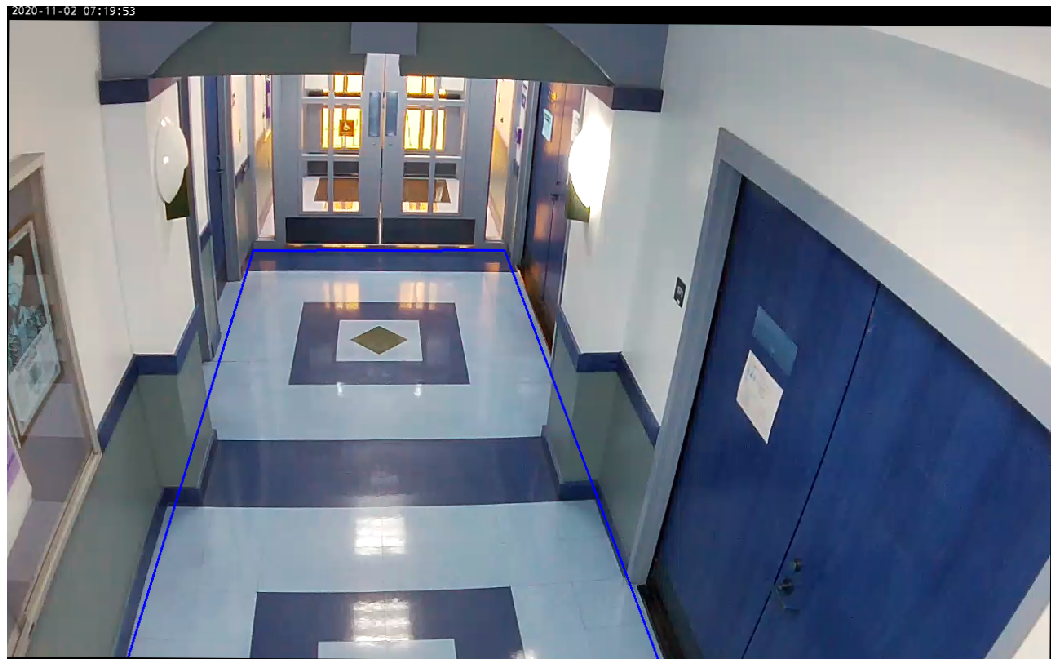

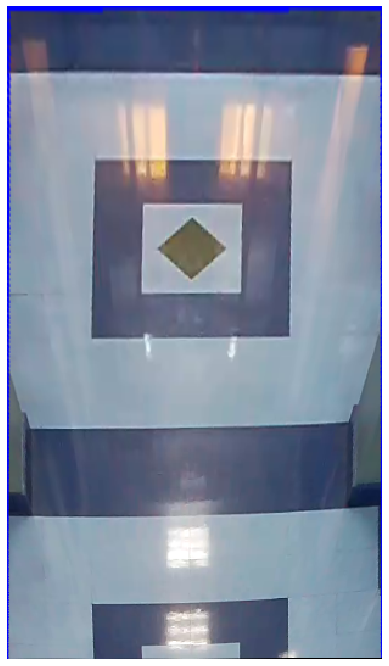

In [9]:
plt.figure(figsize=(20,12))
intial_frame_se = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_se.png')

# pad_se = np.zeros((np.shape(intial_frame_se)[0]+600,np.shape(intial_frame_se)[1]+600,3)).astype(np.uint8)
# pad_se[:,:,0] = np.pad(intial_frame_se[:,:,0],300)
# pad_se[:,:,1] = np.pad(intial_frame_se[:,:,1],300)
# pad_se[:,:,2] = np.pad(intial_frame_se[:,:,2],300)

p1_se = (300, 300)
p2_se = (150, 799)
p3_se = (800,799)
p4_se = (608, 298)

intial_frame_se = cv2.line(intial_frame_se, p1_se, p2_se, color, thickness)
intial_frame_se = cv2.line(intial_frame_se, p1_se, p4_se, color, thickness)
intial_frame_se = cv2.line(intial_frame_se, p3_se, p4_se, color, thickness)


box_se = [p1_se,p2_se,p3_se,p4_se]
intial_frame_se,M_se = calibrate_image(intial_frame_se,box_se)

p1_se_cal = warp_calibrated_coord(p1_se,M_se)
p2_se_cal = warp_calibrated_coord(p2_se,M_se)
p3_se_cal = warp_calibrated_coord(p3_se,M_se)
p4_se_cal = warp_calibrated_coord(p4_se,M_se)
box_se_cal = [p1_se_cal,p2_se_cal,p3_se_cal,p4_se_cal]
print(box_se_cal)

skew_se,M = create_skewed_image(intial_frame_se,box_se_cal)
plt.imshow(intial_frame_se);plt.axis('off')
plt.figure(figsize=(20,12))
plt.imshow(skew_se);plt.axis('off')
print(np.shape(skew_se))

North Exit

(-0.5, 1919.5, 1079.5, -0.5)

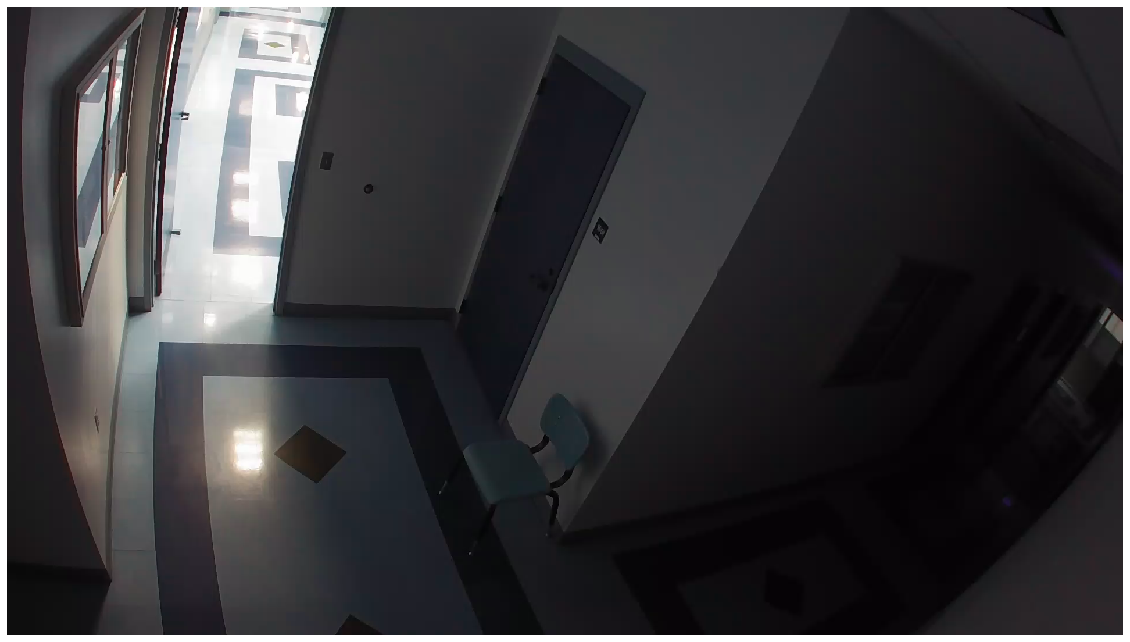

In [10]:
plt.figure(figsize=(20,12))
intial_frame_ne = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_ne.png')

pad_ne = np.zeros((np.shape(intial_frame_ne)[0]+600,np.shape(intial_frame_ne)[1]+600,3)).astype(np.uint8)
pad_ne[:,:,0] = np.pad(intial_frame_ne[:,:,0],300)
pad_ne[:,:,1] = np.pad(intial_frame_ne[:,:,1],300)
pad_ne[:,:,2] = np.pad(intial_frame_ne[:,:,2],300)

# p1_n = (513,692)
# p2_n = (118,1580)
# p3_n = (1280,1580)
# p4_n = (956,699)



# intial_frame_n = cv2.line(pad_n, p1_n, p2_n, color, thickness)
# intial_frame_n = cv2.line(pad_n, p1_n, p4_n, color, thickness)
# intial_frame_n = cv2.line(pad_n, p3_n, p4_n, color, thickness)
plt.imshow(intial_frame_ne);plt.axis('off')

# box_n = [p1_n,p2_n,p3_n,p4_n]
# intial_frame_n,M_n = calibrate_image(intial_frame_n,box_n)

# p1_n_cal = warp_calibrated_coord(p1_n,M_n)
# p2_n_cal = warp_calibrated_coord(p2_n,M_n)
# p3_n_cal = warp_calibrated_coord(p3_n,M_n)
# p4_n_cal = warp_calibrated_coord(p4_n,M_n)
# box_n_cal = [p1_n_cal,p2_n_cal,p3_n_cal,p4_n_cal]
# print(box_n_cal)
# plt.imshow(intial_frame_n);plt.axis('off')
# skew_n,M = create_skewed_image(intial_frame_n,box_n_cal)
# plt.figure(figsize=(20,12))
# plt.imshow(skew_n);plt.axis('off')
# print(np.shape(skew_n))

NW Hall 1

[(506, 695), (125, 1589), (1286, 1571), (949, 695)]


(-0.5, 442.5, 970.5, -0.5)

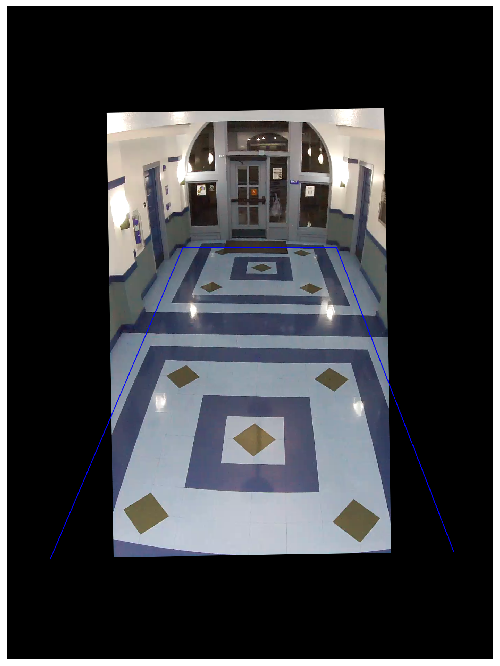

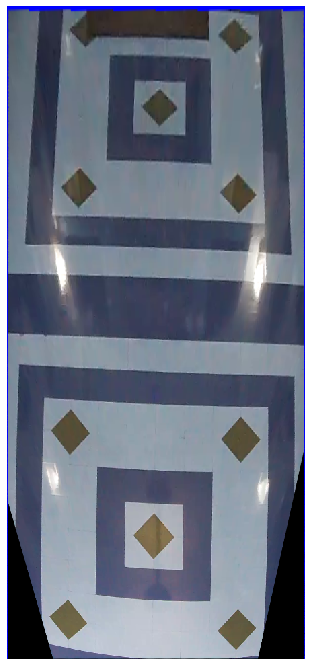

In [ ]:
plt.figure(figsize=(20,12))
intial_frame_n = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_n.png')

pad_n = np.zeros((np.shape(intial_frame_n)[0]+600,np.shape(intial_frame_n)[1]+600,3)).astype(np.uint8)
pad_n[:,:,0] = np.pad(intial_frame_n[:,:,0],300)
pad_n[:,:,1] = np.pad(intial_frame_n[:,:,1],300)
pad_n[:,:,2] = np.pad(intial_frame_n[:,:,2],300)

p1_n = (513,692)
p2_n = (118,1580)
p3_n = (1280,1580)
p4_n = (956,699)



intial_frame_n = cv2.line(pad_n, p1_n, p2_n, color, thickness)
intial_frame_n = cv2.line(pad_n, p1_n, p4_n, color, thickness)
intial_frame_n = cv2.line(pad_n, p3_n, p4_n, color, thickness)

box_n = [p1_n,p2_n,p3_n,p4_n]
intial_frame_n,M_n = calibrate_image(intial_frame_n,box_n)

p1_n_cal = warp_calibrated_coord(p1_n,M_n)
p2_n_cal = warp_calibrated_coord(p2_n,M_n)
p3_n_cal = warp_calibrated_coord(p3_n,M_n)
p4_n_cal = warp_calibrated_coord(p4_n,M_n)
box_n_cal = [p1_n_cal,p2_n_cal,p3_n_cal,p4_n_cal]
print(box_n_cal)
plt.imshow(intial_frame_n);plt.axis('off')
skew_n,M = create_skewed_image(intial_frame_n,box_n_cal)
plt.figure(figsize=(20,12))
plt.imshow(skew_n);plt.axis('off')


[(138, 283), (314, 930), (803, 701), (199, 260)]
[(220, 287), (133, 952), (673, 929), (286, 289)]
(747, 66, 3)


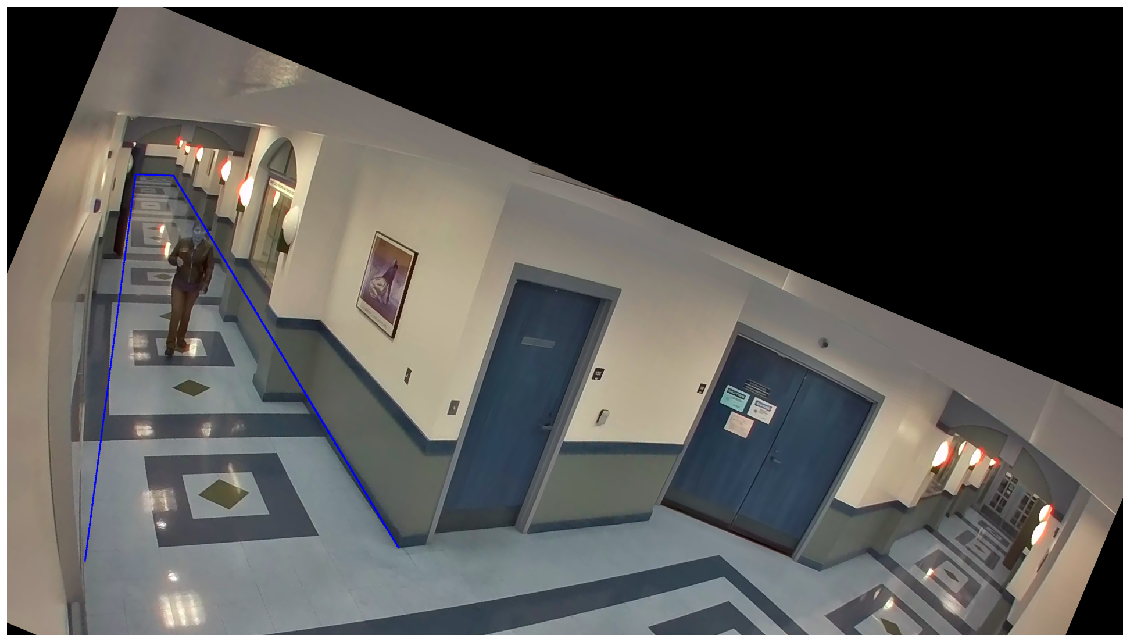

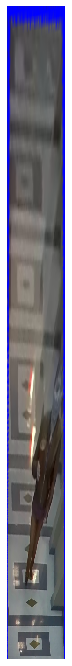

In [ ]:
plt.figure(figsize=(20,12))
intial_frame_nw = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_nw.png')
pad_factor = int(0/2)
pad_nw = np.zeros((np.shape(intial_frame_nw)[0]+2*pad_factor,np.shape(intial_frame_nw)[1]+2*pad_factor,3)).astype(np.uint8)
pad_nw[:,:,0] = np.pad(intial_frame_nw[:,:,0],pad_factor)
pad_nw[:,:,1] = np.pad(intial_frame_nw[:,:,1],pad_factor)
pad_nw[:,:,2] = np.pad(intial_frame_nw[:,:,2],pad_factor)

p1_nw = (138+pad_factor,283+pad_factor)
p2_nw = (314+pad_factor,930+pad_factor)
p3_nw = (803+pad_factor,701+pad_factor)
p4_nw = (199+pad_factor,260+pad_factor)

intial_frame_nw = cv2.line(pad_nw, p1_nw, p2_nw, color, thickness)
intial_frame_nw = cv2.line(pad_nw, p1_nw, p4_nw, color, thickness)
intial_frame_nw = cv2.line(pad_nw, p3_nw, p4_nw, color, thickness)


box_nw = [p1_nw,p2_nw,p3_nw,p4_nw]
pad_nw,M_nw = calibrate_image(pad_nw,box_nw)
plt.imshow(pad_nw);plt.axis('off')
print(box_nw)
p1_nw_cal = warp_calibrated_coord(p1_nw,M_nw)
p2_nw_cal = warp_calibrated_coord(p2_nw,M_nw)
p3_nw_cal = warp_calibrated_coord(p3_nw,M_nw)
p4_nw_cal = warp_calibrated_coord(p4_nw,M_nw)
box_nw_cal = [p1_nw_cal,p2_nw_cal,p3_nw_cal,p4_nw_cal]
print(box_nw_cal)
plt.imshow(pad_nw);plt.axis('off')
skew_nw,M = create_skewed_image(pad_nw,box_nw_cal)
plt.figure(figsize=(20,12))
plt.imshow(skew_nw);plt.axis('off')
print(np.shape(skew_nw))

NW Hall Lobby

[(720, 787), (633, 1452), (1173, 1429), (786, 789)]
(971, 443, 3)


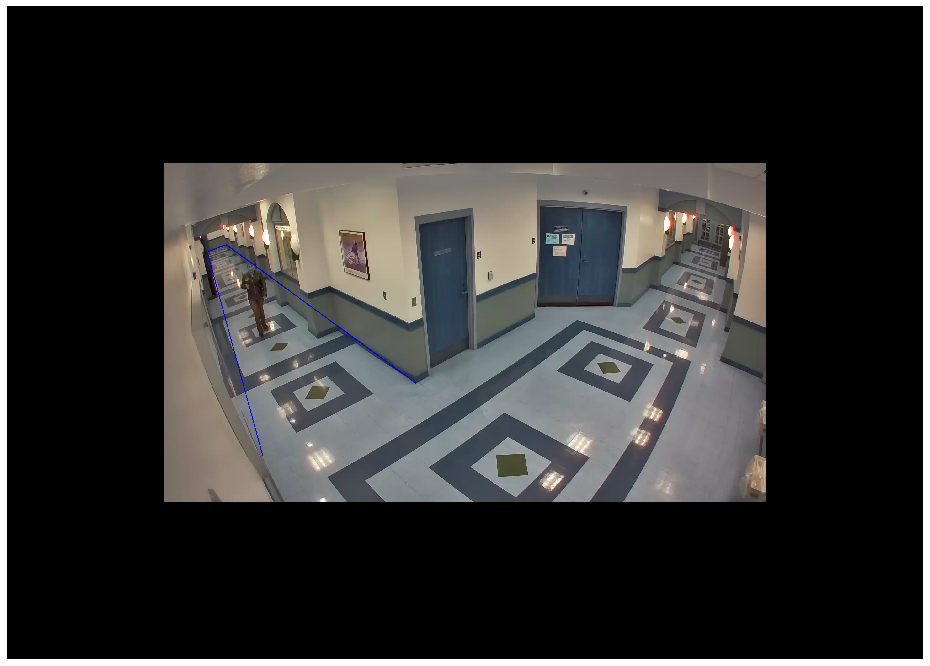

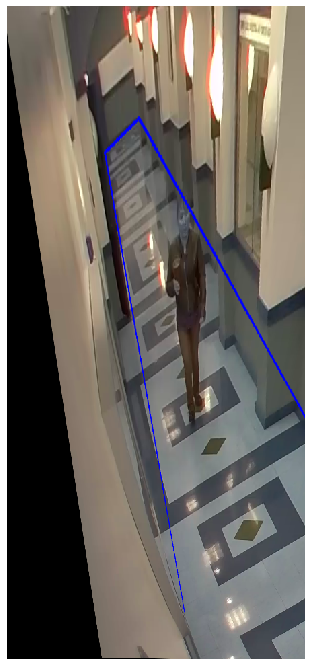

In [ ]:
plt.figure(figsize=(20,12))
intial_frame_nw = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_nw.png')
pad_factor = int(1000/2)
pad_nw = np.zeros((np.shape(intial_frame_nw)[0]+2*pad_factor,np.shape(intial_frame_nw)[1]+2*pad_factor,3)).astype(np.uint8)
pad_nw[:,:,0] = np.pad(intial_frame_nw[:,:,0],pad_factor)
pad_nw[:,:,1] = np.pad(intial_frame_nw[:,:,1],pad_factor)
pad_nw[:,:,2] = np.pad(intial_frame_nw[:,:,2],pad_factor)

p1_nw = (138+pad_factor,283+pad_factor)
p2_nw = (314+pad_factor,930+pad_factor)
p3_nw = (803+pad_factor,701+pad_factor)
p4_nw = (199+pad_factor,260+pad_factor)

intial_frame_nw = cv2.line(pad_nw, p1_nw, p2_nw, color, thickness)
intial_frame_nw = cv2.line(pad_nw, p1_nw, p4_nw, color, thickness)
intial_frame_nw = cv2.line(pad_nw, p3_nw, p4_nw, color, thickness)


box_nw = [p1_nw,p2_nw,p3_nw,p4_nw]
pad_nw,M_nw = calibrate_image(pad_nw,box_nw)
plt.imshow(pad_nw);plt.axis('off')
# print(box_nw)
p1_nw_cal = warp_calibrated_coord(p1_nw,M_nw)
p2_nw_cal = warp_calibrated_coord(p2_nw,M_nw)
p3_nw_cal = warp_calibrated_coord(p3_nw,M_nw)
p4_nw_cal = warp_calibrated_coord(p4_nw,M_nw)
box_nw_cal = [p1_nw_cal,p2_nw_cal,p3_nw_cal,p4_nw_cal]
print(box_nw_cal)
plt.imshow(intial_frame_nw);plt.axis('off')
skew_nw,M = create_skewed_image(intial_frame_nw,box_n_cal)
plt.figure(figsize=(20,12))
plt.imshow(skew_nw);plt.axis('off')
print(np.shape(skew_n))